<a href="https://colab.research.google.com/github/Maryam1597/Applieddatascience1/blob/main/Autistic%20spectrum%20disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Autism Spectrum Disorder (ASD) Traits in Adults Using Behavioral and Demographic Indicators**

# **Library Installation And Import**

## **Install Required Libraries**

In [16]:

!pip install ucimlrepo


## **Import Libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# **DATASET LOADING**

In [3]:
# Fetch dataset
autism_screening_adult = fetch_ucirepo(id=426)

# Features and target
X = autism_screening_adult.data.features
y = autism_screening_adult.data.targets

# Combine for EDA
df = pd.concat([X, y], axis=1)

# Quick checks
print(df.shape)
df.head()


(704, 21)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,family_pdd,country_of_res,used_app_before,result,age_desc,relation,class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


# **INITIAL DATA EXPLORATION**

In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jaundice         704 non-null    object 
 14  family_pdd       704 non-null    object 
 15  country_of_res   704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


# **Exploratory Data Analysis**

## **Target Variable Distribution (Class Imbalance)**

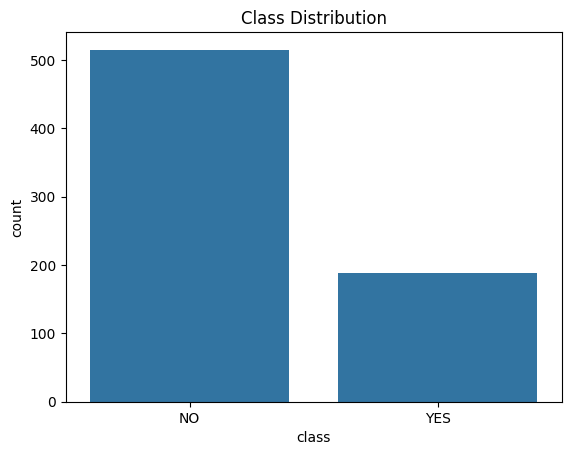

In [5]:
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()


## **Correlation Matrix (Numerical Features)**

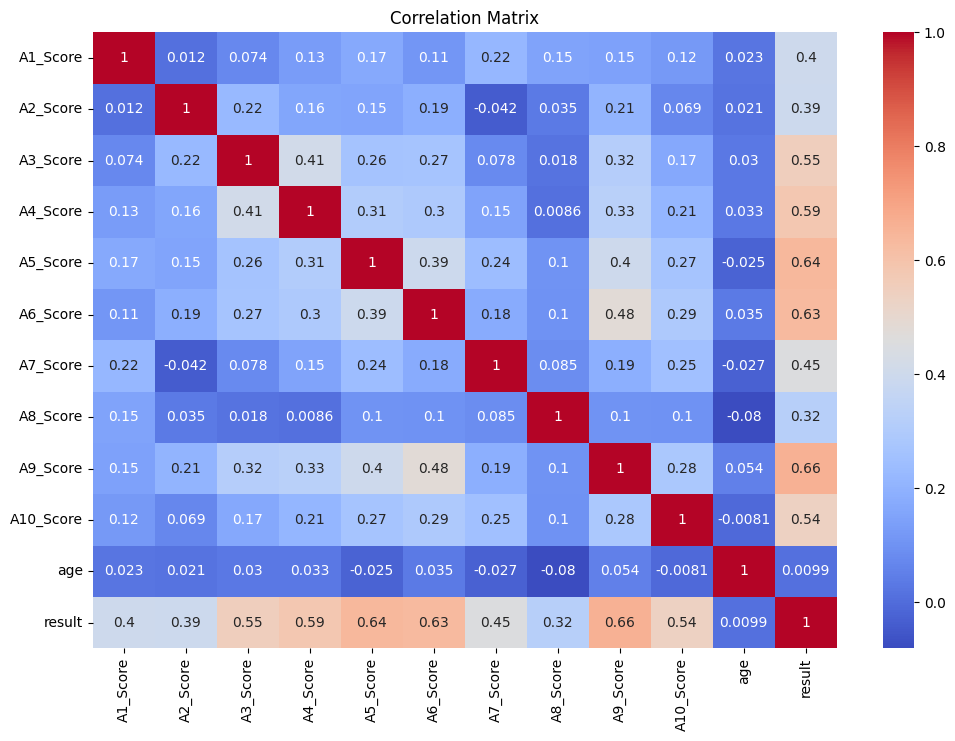

In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## **Outlier Detection**

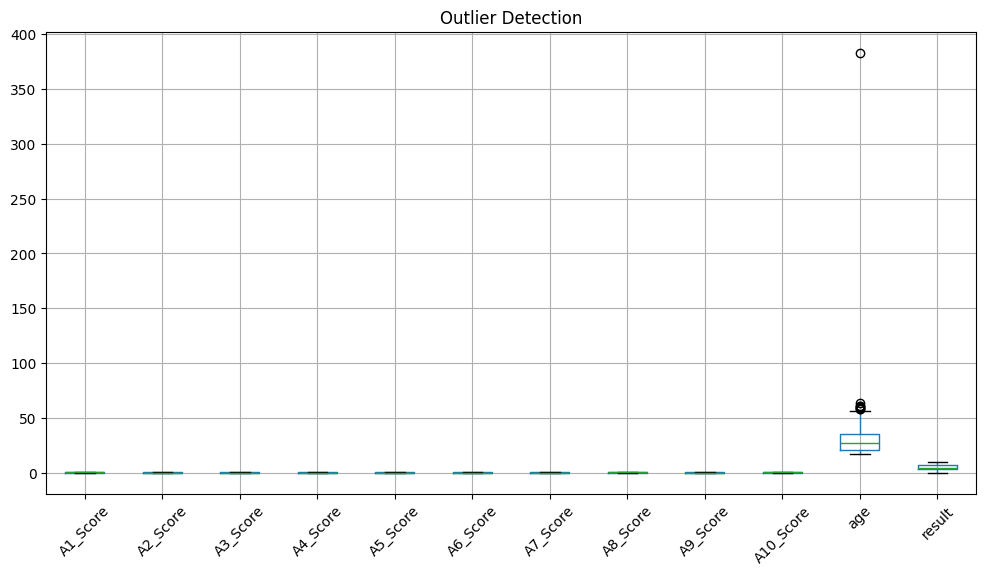

In [7]:
plt.figure(figsize=(12,6))
df[numerical_cols].boxplot(rot=45)
plt.title("Outlier Detection")
plt.show()


## **Age Distribution**

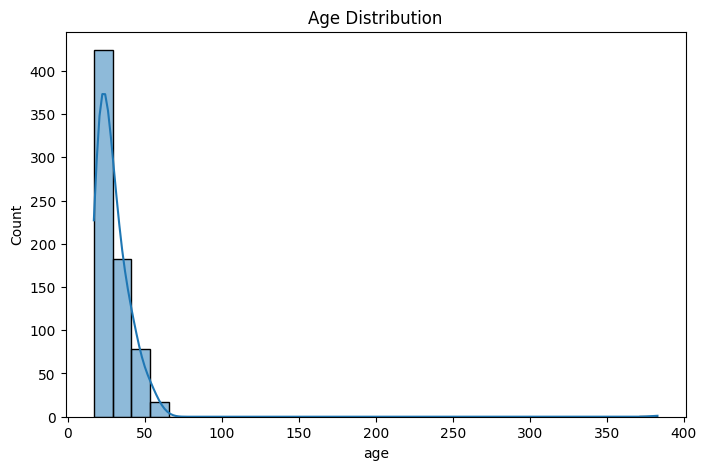

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


# **Separate Features & Target**

In [9]:
X = df.drop('class', axis=1)
y = df['class']


## **Train–Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# **DATA PREPROCESSING**

## **Identify Column Types**

In [11]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


## **Handling Missing Values**

In [12]:
# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply on TRAIN
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])

# Apply on TEST (no fit!)
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])


## **Categorial feature Encoding**

In [13]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])


## **Encode Target Variable**

In [14]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


## **Feature Scaling**

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (optional but clean)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
